In [1]:
# Add PATH (adapt!)
push!(LOAD_PATH, "/Volumes/cfranken/code/gitHub/LSM-SPAM/src/Leaf/");
push!(LOAD_PATH, "/Volumes/cfranken/code/gitHub/LSM-SPAM/src/Utils/");
#push!(LOAD_PATH, "/Volumes/cfranken/code/gitHub/LSM-SPAM/src/tools/");

In [2]:
# Use FluspectMod
using FluspectMod
using BenchmarkTools


┌ Info: Precompiling FluspectMod [top-level]
└ @ Base loading.jl:1273


Reading Optical Parameters from 400.0 to 2400.0 length: 401


In [1]:
# Use Plots:
using Plots
plotly()

┌ Info: For saving to png with the Plotly backend ORCA has to be installed.
└ @ Plots /Users/cfranken/.julia/packages/Plots/RsO3g/src/backends.jl:363


Plots.PlotlyBackend()

---
Run Fluspect, leaf optical property generator (provides reflectance and transmittance)

In [11]:
@benchmark FluspectMod.fluspect!(FluspectMod.leaf, FluspectMod.optis)

BenchmarkTools.Trial: 
  memory estimate:  2.93 MiB
  allocs estimate:  7304
  --------------
  minimum time:     1.214 ms (0.00% GC)
  median time:      1.435 ms (0.00% GC)
  mean time:        1.752 ms (16.38% GC)
  maximum time:     9.669 ms (70.58% GC)
  --------------
  samples:          2845
  evals/sample:     1

In [12]:
FluspectMod.fluspect!(FluspectMod.leaf, FluspectMod.optis)
# Look at standard Leaf properties:
FluspectMod.leaf

leafbio{Float32}
  N: Float32 1.5f0
  Cab: Float32 40.0f0
  Car: Float32 10.0f0
  Ant: Float32 8.0f0
  Cs: Float32 0.0f0
  Cw: Float32 0.015f0
  Cm: Float32 0.01f0
  Cx: Float32 0.0f0
  ρ_LW: Float32 0.01f0
  τ_LW: Float32 0.01f0
  fqe: Float32 0.01f0
  ρ_SW: Array{Float32}((400,)) Float32[0.043229003, 0.042893898, 0.042545002, 0.042216312, 0.041949797, 0.0417443, 0.041574005, 0.04142088, 0.04127509, 0.041143484  …  0.06375158, 0.062291823, 0.060889617, 0.059394546, 0.057792455, 0.056191787, 0.054521766, 0.0528687, 0.05111216, 0.049500566]
  τ_SW: Array{Float32}((400,)) Float32[0.00010728257, 0.00013348939, 0.00017254804, 0.00022109417, 0.00025385505, 0.00026848057, 0.00026038272, 0.00026014293, 0.0003052836, 0.00044135549  …  0.11938179, 0.11688865, 0.11450527, 0.11190032, 0.10902734, 0.1061351, 0.10303812, 0.09994121, 0.096576415, 0.09340866]
  kChlrel: Array{Float32}((400,)) Float32[0.46379963, 0.5001658, 0.5231522, 0.53383744, 0.5437958, 0.55638516, 0.57098675, 0.5786515, 0.5702224

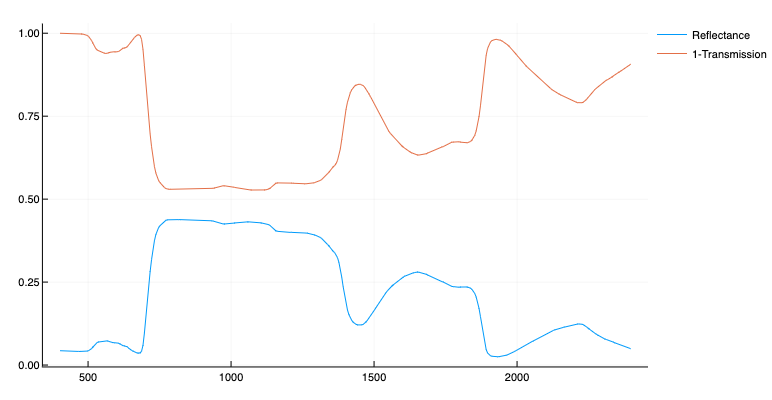

In [13]:
plot(FluspectMod.optis.lambda, FluspectMod.leaf.ρ_SW, label="Reflectance")
plot!(FluspectMod.optis.lambda, 1 .-FluspectMod.leaf.τ_SW, label="1-Transmission")

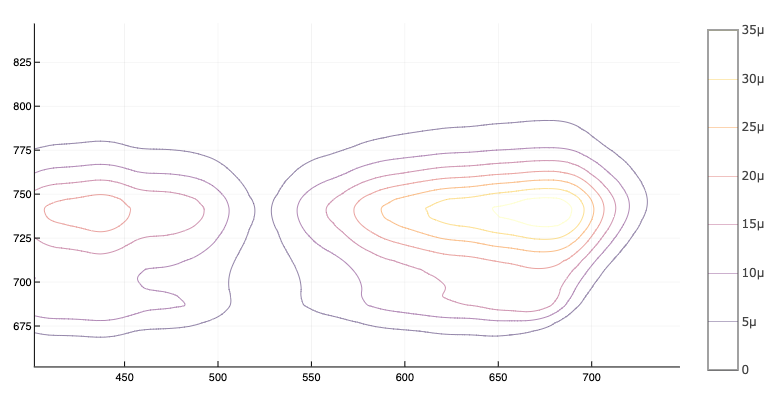

In [14]:
contour(FluspectMod.wle, FluspectMod.wlf, FluspectMod.leaf.Mb)

In [8]:
@benchmark pl = FluspectMod.RTM_sail!(FluspectMod.leaf, FluspectMod.canopy, FluspectMod.angle)

BenchmarkTools.Trial: 
  memory estimate:  1.88 MiB
  allocs estimate:  7027
  --------------
  minimum time:     1.656 ms (0.00% GC)
  median time:      1.801 ms (0.00% GC)
  mean time:        1.946 ms (5.73% GC)
  maximum time:     6.837 ms (67.49% GC)
  --------------
  samples:          2562
  evals/sample:     1

In [9]:
typeof(pl)

Array{Float32,2}

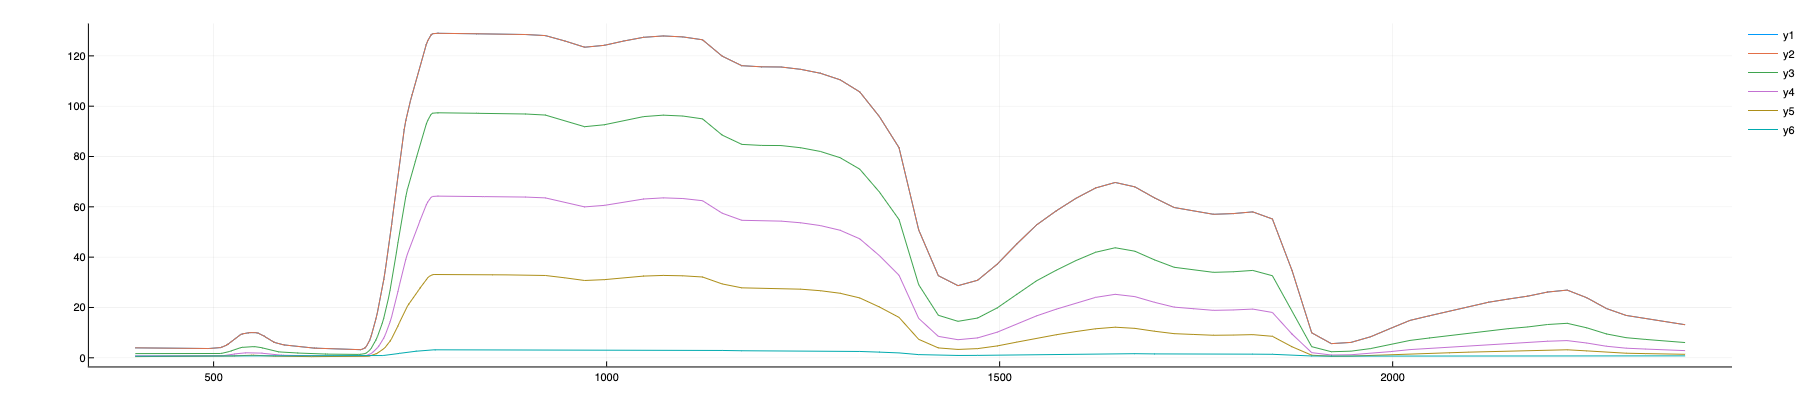

In [8]:
plot(FluspectMod.lambda,pl[1,:])
#plot!(FluspectMod.lambda,pl[10,:])
#plot!(FluspectMod.lambda,pl[20,:])
plot!(FluspectMod.lambda,pl[1:5:end,:]')

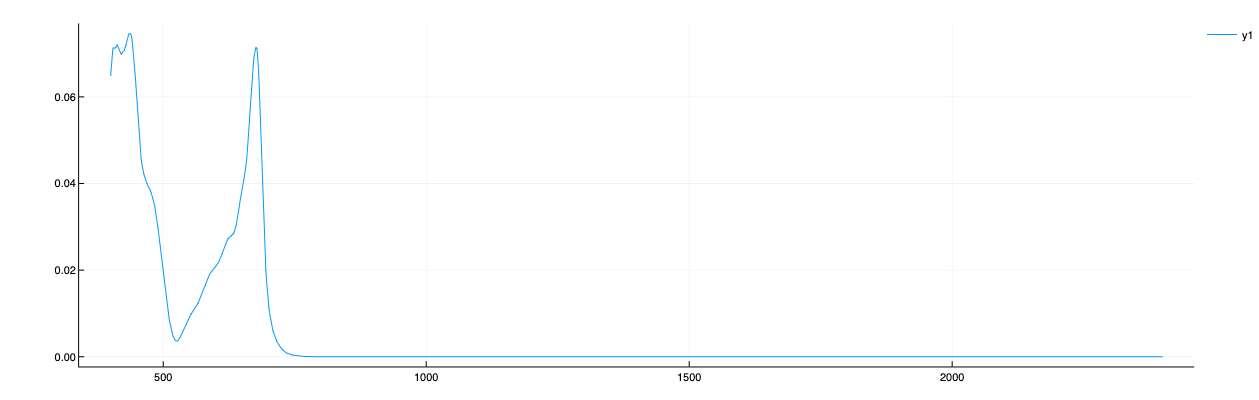

In [7]:
plot(FluspectMod.lambda, FluspectMod.Kab.+eps())


In [8]:
@benchmark RT = FluspectMod.fluspect!(x[1:8],fqe=0.0)


BenchmarkTools.Trial: 
  memory estimate:  1.35 MiB
  allocs estimate:  6277
  --------------
  minimum time:     771.136 μs (0.00% GC)
  median time:      841.385 μs (0.00% GC)
  mean time:        919.628 μs (7.68% GC)
  maximum time:     6.329 ms (0.00% GC)
  --------------
  samples:          5414
  evals/sample:     1

In [17]:
plot(FluspectMod.lambda, RT[:,1])

UndefVarError: UndefVarError: RT not defined